To do:
* Integrate with model (uh oh...)
* Change prints to logs

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

import sys
sys.path.append('../model')
import focusmodel

from glob import glob
import numpy as np

import analysis

In [230]:
from imp import reload
reload(analysis)

<module 'analysis' from '/Users/kgorkom/Desktop/Things/TEL/Hubble_Focus/git/hubble-focus/analysis/analysis.py'>

# Read in archived datasets

`analysis.Analysis` reads in all archived datasets, creates per-visit averages, and generates model components (and model-subtracted measurements) on the fly.

Here, `data.fitpsf` gives the individual measurements (per star per image), `data.visit` creates the visit-averaged products, and `data.moves` holds the SM moves.

In [231]:
data = analysis.Analysis(thermal_path = '.')

INFO:analysis:Querying the archive...
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit02-aug2009/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit02-aug2009/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit03-aug2009/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit03-aug2009/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit04-aug2009/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit04-aug2009/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit06-oct2009/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit06-oct2009/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit08-dec2009/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit08-dec2009/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop11877/visit07-nov2009/

INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop12780/visit12-oct2012/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop12780/visit12-oct2012/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop12780/visit10-aug2012/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop12780/visit10-aug2012/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop13170/visit01-dec2012/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop13170/visit01-dec2012/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop13170/visit02-jan2013/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop13170/visit02-jan2013/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop13170/visit06-may2013/resultsChip1.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop13170/visit06-may2013/resultsChip2.txt
INFO:analysis:Adding: /grp/hst/OTA/focus/Data/prop13170/visit08-july2013/resultsChip2.txt
INFO:analysis:Adding

/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degre

/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degre

/Users/kgorkom/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


# Regular Reporting Suite

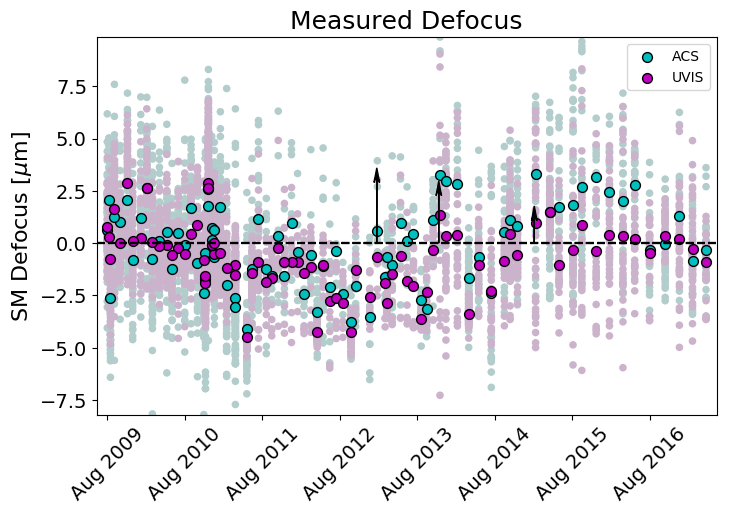

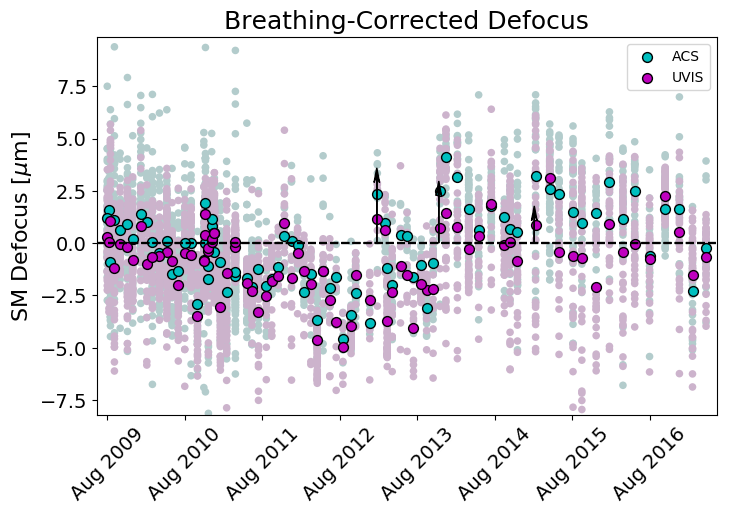

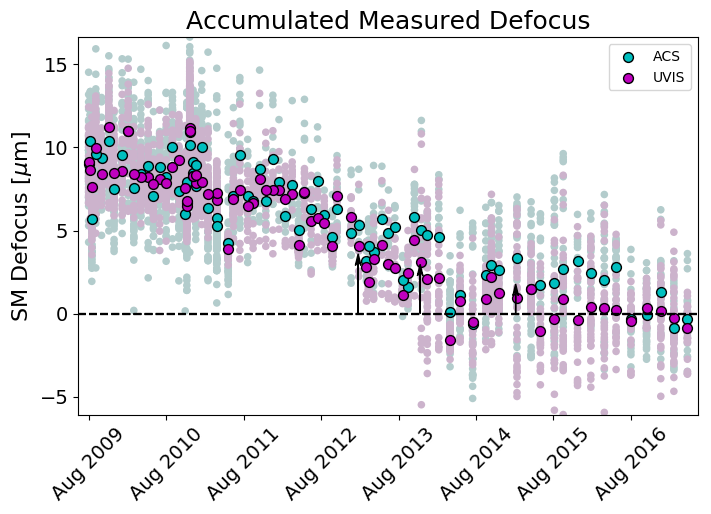

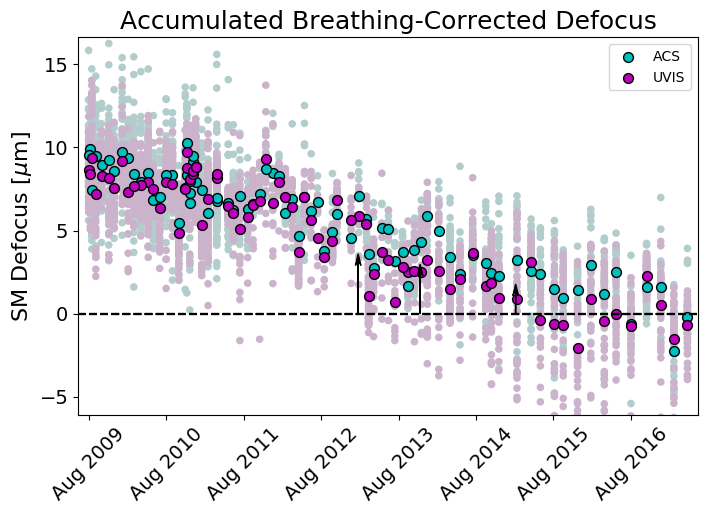

In [232]:
data.plot_suite(figsize = (8, 5))

# Overplot model components

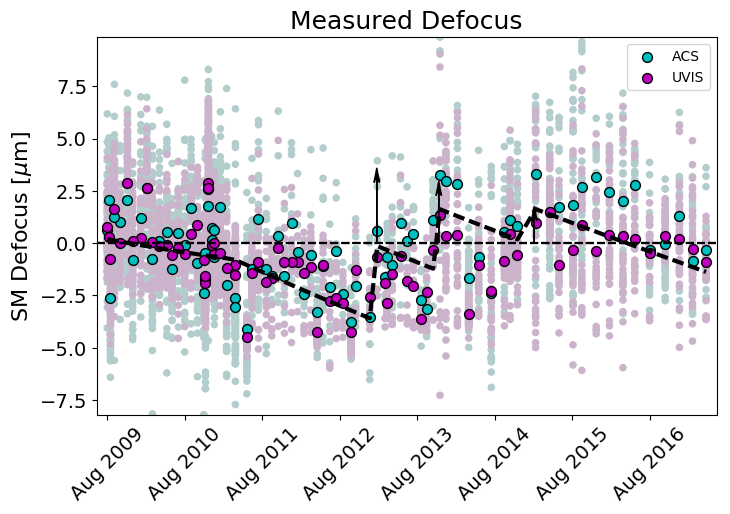

In [233]:
data.plot_suite(figsize = (8, 5), figures=[1,])
data.plot_line(data.fitpsf['mjd'],data.fitpsf['secular_model_steps'])

# Regression lines

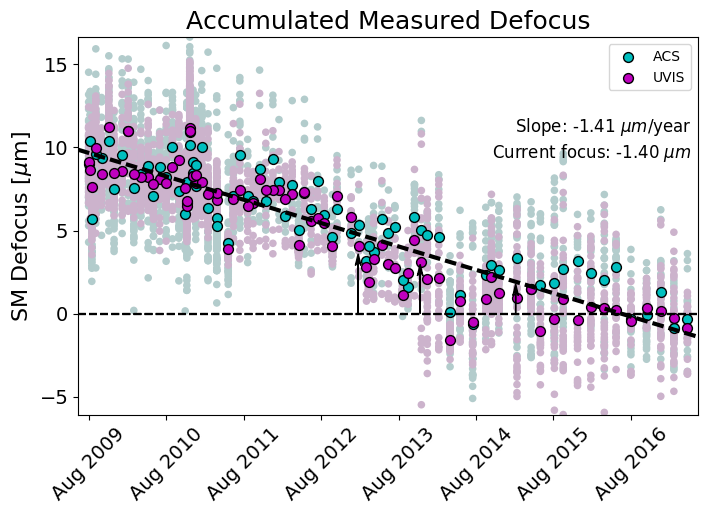

In [234]:
# fit all data after January 1st, 2013
start = data._toMJD('2013.01.01')
idx = data.visit['mjd_mean'] >= start

line_x, line_y, slope = data.line_fit(data.visit['mjd_mean'],data.visit['dSM_mean'] + data.visit['accumSM_mean'])
current = line_y[-1]

data.plot_suite(figsize = (8, 5), figures=[3,])
data.plot_line(line_x,line_y)

plt.text(0.99,0.75,'Slope: {:+.2f} $\mu m$/year'.format(slope*365),
    fontsize=12,transform=plt.gca().transAxes, horizontalalignment='right')
plt.text(0.99,0.68,'Current focus: {:+.2f} $\mu m$'.format(current),
    fontsize=12,transform=plt.gca().transAxes, horizontalalignment='right')

# Plotting Cameras against Model Components

In [235]:
acs, uvis = data.split_cam_chip(data.fitpsf, 'camera') # Get indices for separate cameras
model_mjd, model = focusmodel.orbital((57674.61, 57674.7), thermal_path = '.') # Generate model on telemetry sampling

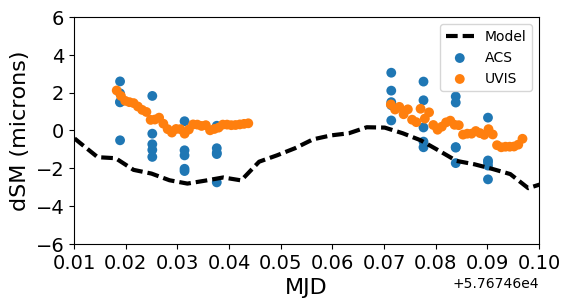

In [236]:
fig = plt.figure(figsize=(6,3))
acs = data.scatter_plot(data.fitpsf['mjd'][acs],data.fitpsf['dSM'][acs])
acs.set_label('ACS')
uvis = data.scatter_plot(data.fitpsf['mjd'][uvis],data.fitpsf['dSM'][uvis])
uvis.set_label('UVIS')
model_line = data.plot_line(model_mjd,model)
model_line.set_label('Model')

plt.xlim(57674.61, 57674.7)
plt.ylim(-6, 6.)

plt.xlabel('MJD')
plt.ylabel('dSM (microns)')
plt.legend(loc = 'upper right')

# Confocality

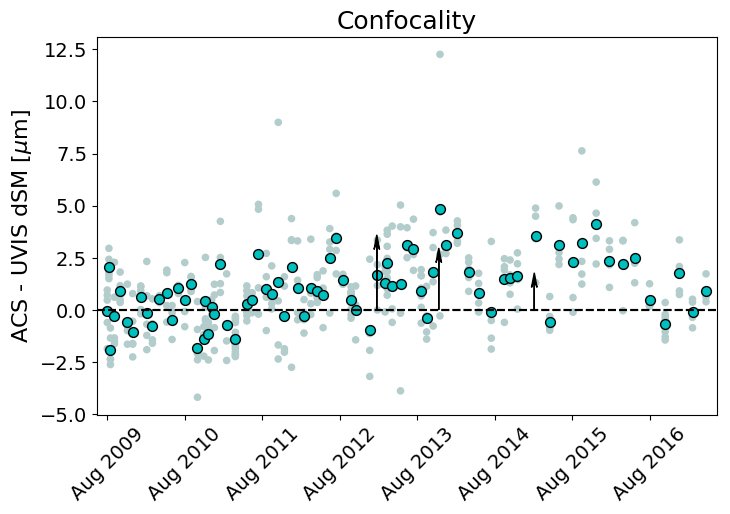

In [237]:
data.plot_confocality(figsize = (8, 5))